## Airline Tweets - Sentiment Analysis Project

US Airline data which contain comments of passengers on the basis of service provided by Airlines.

Importing libraries and packages used for natural language processing, data visualization, and machine learning.

The NLTK library is used for tokenization, stopword removal, and lemmatization. It is also used to download required NLTK datasets.

NumPy and Pandas are used for data manipulation and analysis.

Seaborn and Matplotlib are used for data visualization.

Scikit-learn's CountVectorizer and train_test_split functions are used for data preprocessing.

The WordCloud library is used for creating word clouds.

Finally, the Tokenizer and sequence functions from the Keras library are imported for data preprocessing.

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,SimpleRNN,LSTM,GRU,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path=('/content/drive/MyDrive/Tweets.csv')

In [4]:
df = pd.read_csv(path)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.drop(['tweet_coord','tweet_created','tweet_location','user_timezone','name','tweet_id','airline_sentiment_gold','negativereason_gold'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   retweet_count                 14640 non-null  int64  
 6   text                          14640 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 800.8+ KB


In [9]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

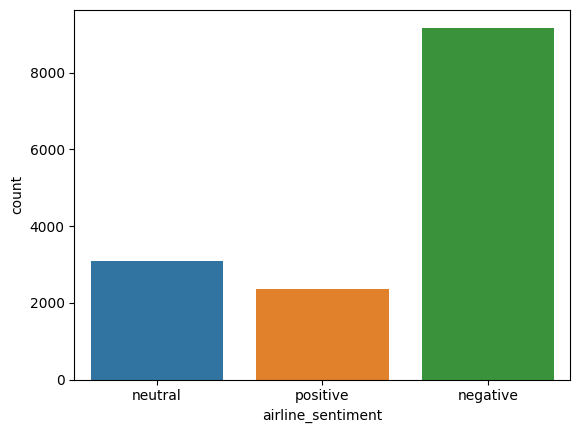

In [10]:
sns.countplot(x="airline_sentiment",data=df)

In [11]:
df.drop(df.loc[df['airline_sentiment']=='neutral'].index,inplace=True)

In [12]:
df = df[["airline_sentiment","text"]]
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [13]:
#removing the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# removing the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# removing the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
df['text'].head()

1     plus you've added commercials to the experien...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
5     seriously would pay $ a flight for seats that...
6     yes, nearly every time I fly VX this “ear wor...
Name: text, dtype: object

In [14]:
positive = df[df["airline_sentiment"]== 'positive'].text
negative = df[df["airline_sentiment"]== 'negative'].text

## This code generates a word cloud visualization of the positive & negative sentiment words.

(-0.5, 1599.5, 719.5, -0.5)

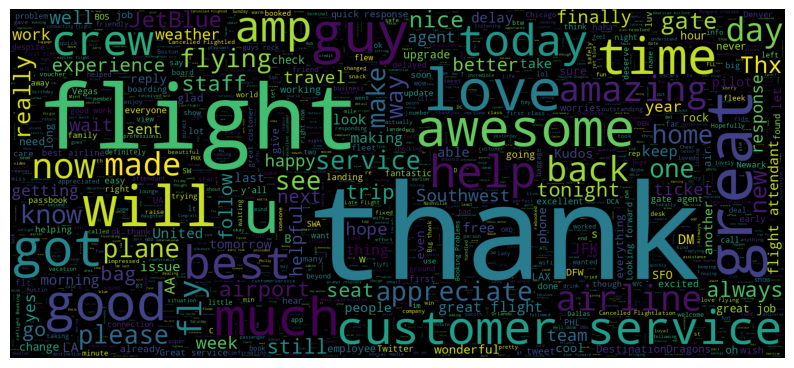

In [15]:
fig,ax = plt.subplots(figsize=(10,8))
word_cloud_positive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(word_cloud_positive)
ax.grid(False)
plt.axis("off")

(-0.5, 1599.5, 719.5, -0.5)

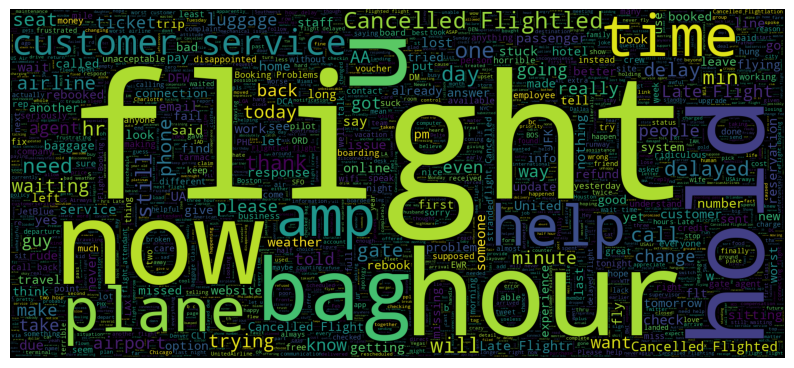

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
word_cloud_negative=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(negative))
plt.imshow(word_cloud_negative)
ax.grid(False)
plt.axis("off")

In [18]:
#!pip install emoji
from nltk.corpus import stopwords
from string import punctuation
import string
import emoji
df['text']=df['text'].str.lower()


In [19]:
stopword_list = stopwords.words("chinese")
print(stopword_list)

['一', '一下', '一些', '一切', '一则', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一直', '一致', '一般', '一起', '一边', '一面', '万一', '上下', '上升', '上去', '上来', '上述', '上面', '下列', '下去', '下来', '下面', '不一', '不久', '不仅', '不会', '不但', '不光', '不单', '不变', '不只', '不可', '不同', '不够', '不如', '不得', '不怕', '不惟', '不成', '不拘', '不敢', '不断', '不是', '不比', '不然', '不特', '不独', '不管', '不能', '不要', '不论', '不足', '不过', '不问', '与', '与其', '与否', '与此同时', '专门', '且', '两者', '严格', '严重', '个', '个人', '个别', '中小', '中间', '丰富', '临', '为', '为主', '为了', '为什么', '为什麽', '为何', '为着', '主张', '主要', '举行', '乃', '乃至', '么', '之', '之一', '之前', '之后', '之後', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也是', '也罢', '了', '了解', '争取', '于', '于是', '于是乎', '云云', '互相', '产生', '人们', '人家', '什么', '什么样', '什麽', '今后', '今天', '今年', '今後', '仍然', '从', '从事', '从而', '他', '他人', '他们', '他的', '代替', '以', '以上', '以下', '以为', '以便', '以免', '以前', '以及', '以后', '以外', '以後', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '任务', '企图', '伟大', '似乎', '似的', '但', '但是', '何', '何况', '何处', '何时', '作为', '你', '你们', '你的', '使得', '使用'

In [22]:
def remove_stopwords(text):
  clean_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  clean_text = [word for word in clean_text if word not in punctuation]
  text = " ".join(clean_text)
  return(text)
df['s_clean_text']=df['text'].apply(remove_stopwords)


In [23]:
print(df['s_clean_text'])

1              plus added commercials experience... tacky.
3        really aggressive blast obnoxious "entertainme...
4                                     really big bad thing
5        seriously would pay flight seats playing. real...
6        yes, nearly every time fly vx “ear worm” won’t...
                               ...                        
14633    flight cancelled flightled, leaving tomorrow m...
14634                                    right cue delays👌
14635                  thank got different flight chicago.
14636    leaving minutes late flight. warnings communic...
14638    money, change flight, answer phones! suggestio...
Name: s_clean_text, Length: 11541, dtype: object


In [26]:
def demojify(inputString):
   return inputString.encode('ascii','ignore').decode('ascii')


In [27]:
df['text']=df['s_clean_text'].apply(lambda x : emoji.demojize(x))
df['text']=df['s_clean_text'].apply(demojify)

In [28]:
df['text']

1              plus added commercials experience... tacky.
3        really aggressive blast obnoxious "entertainme...
4                                     really big bad thing
5        seriously would pay flight seats playing. real...
6        yes, nearly every time fly vx ear worm wont go...
                               ...                        
14633    flight cancelled flightled, leaving tomorrow m...
14634                                     right cue delays
14635                  thank got different flight chicago.
14636    leaving minutes late flight. warnings communic...
14638    money, change flight, answer phones! suggestio...
Name: text, Length: 11541, dtype: object

In [29]:
df["tweets"]=df["text"]+" "+ df["s_clean_text"]

In [30]:
df.drop(["text","s_clean_text"],axis=1,inplace=True)

In [31]:
df.head()

,airline_sentiment,tweets
1,positive,plus added commercials experience... tacky. pl...
3,negative,"really aggressive blast obnoxious ""entertainme..."
4,negative,really big bad thing really big bad thing
5,negative,seriously would pay flight seats playing. real...
6,positive,"yes, nearly every time fly vx ear worm wont go..."


This code imports the LabelEncoder class from scikit-learn's preprocessing module.

The LabelEncoder class is used to encode categorical target labels with numerical values.
DataFrame is "airline_sentiment", which contains three categorical labels: "positive", "neutral", and "negative".

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline_sentiment"]=le.fit_transform(df["airline_sentiment"])

In [33]:
df["airline_sentiment"].value_counts()

0    9178
1    2363
Name: airline_sentiment, dtype: int64

In [35]:
X = df["tweets"]
y = df["airline_sentiment"]
print(len(X),len(y))


11541 11541


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [38]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

8078 8078
3463 3463


## Keras Tokenizer

The Tokenizer class is used to convert text data into numerical sequences that can be fed into a neural network.

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [40]:
vocabulary = tokenizer.index_word

vocabulary_length = len(vocabulary)

print(vocabulary_length)

print(vocabulary)


8653
{1: 'flight', 2: 'get', 3: 'cancelled', 4: 'thanks', 5: 'service', 6: 'customer', 7: 'help', 8: 'hours', 9: 'time', 10: 'hold', 11: 'us', 12: 'plane', 13: 'amp', 14: "i'm", 15: 'delayed', 16: 'thank', 17: 'still', 18: 'flights', 19: 'one', 20: 'hour', 21: 'call', 22: 'flightled', 23: 'gate', 24: "can't", 25: 'you', 26: 'back', 27: 'got', 28: 'bag', 29: 'would', 30: 'late', 31: 'phone', 32: 'need', 33: 'please', 34: 'airline', 35: 'like', 36: 'today', 37: 'waiting', 38: 'guys', 39: 'fly', 40: "i've", 41: 'day', 42: 'trying', 43: 'hrs', 44: 'u', 45: 'great', 46: 'wait', 47: 'me', 48: 'never', 49: 'really', 50: 'delay', 51: 'airport', 52: 'even', 53: 'minutes', 54: 'luggage', 55: 'way', 56: 'going', 57: 'last', 58: 'bags', 59: 'it', 60: 'weather', 61: 'people', 62: 'agent', 63: 'home', 64: 'good', 65: 'know', 66: 'another', 67: 'go', 68: 'ever', 69: 'make', 70: 'change', 71: 'told', 72: 'aa', 73: 'flying', 74: 'now', 75: 'take', 76: 'united', 77: 'w', 78: 'seat', 79: 'check', 80: 'da

In [41]:
train_sequence = tokenizer.texts_to_sequences(X_train)
print(train_sequence)

[[1810, 1, 3, 83, 94, 60, 428, 663, 3, 83, 1, 817, 1810, 1, 3, 83, 94, 60, 428, 663, 3, 83, 1, 817], [120, 1811, 363, 664, 818, 29, 954, 165, 66, 1, 239, 120, 1811, 363, 664, 818, 29, 954, 165, 66, 1, 239], [369, 859, 2420, 350, 106, 240, 369, 859, 2420, 350, 106, 240], [291, 3036, 438, 343, 4194, 291, 3036, 438, 343, 4194], [179, 955, 503, 685, 410, 338, 241, 108, 1354, 955, 270, 142, 179, 955, 503, 685, 410, 338, 241, 108, 1354, 955, 270, 142], [819, 638, 75, 3037, 4195, 64, 4196, 265, 471, 819, 638, 75, 3037, 4195, 64, 4196, 265, 471], [3038, 38, 234, 90, 38, 3038, 4176, 38, 234, 90, 38, 8418], [504, 481, 49, 175, 481, 820, 178, 860, 4197, 517, 504, 481, 743, 49, 175, 481, 8419, 820, 178, 860, 4197], [24, 613, 153, 614, 123, 1, 48, 540, 187, 35, 4198, 24, 613, 153, 614, 123, 1, 48, 540, 187, 35, 4198], [29, 64, 65, 581, 189, 3, 22, 18, 391, 92, 4199, 175, 639, 29, 64, 65, 581, 189, 3, 22, 18, 391, 92, 4199, 175, 639], [136, 71, 97, 12, 20, 328, 91, 149, 136, 71, 97, 12, 20, 328, 91,

In [42]:
doc_length = []
for doc in train_sequence:
  doc_length.append(len(doc))

print(doc_length)

[24, 22, 12, 10, 24, 18, 12, 21, 22, 26, 16, 24, 14, 22, 10, 20, 10, 26, 24, 10, 16, 22, 16, 16, 20, 24, 26, 8, 22, 18, 20, 10, 18, 18, 18, 16, 18, 30, 26, 18, 4, 18, 20, 24, 16, 34, 32, 16, 28, 8, 23, 22, 30, 34, 30, 22, 28, 22, 24, 20, 8, 12, 6, 32, 16, 26, 20, 14, 24, 14, 20, 14, 11, 22, 14, 12, 16, 4, 28, 10, 20, 26, 10, 8, 12, 30, 16, 24, 22, 26, 8, 6, 18, 26, 24, 32, 16, 16, 24, 20, 14, 14, 24, 22, 34, 30, 30, 8, 18, 30, 22, 20, 14, 12, 22, 20, 18, 8, 28, 12, 26, 18, 14, 24, 20, 22, 30, 24, 16, 16, 28, 20, 24, 24, 18, 28, 16, 22, 28, 31, 22, 26, 26, 9, 22, 22, 10, 34, 4, 8, 14, 16, 8, 28, 22, 20, 34, 20, 24, 32, 22, 10, 24, 34, 26, 20, 18, 28, 26, 6, 4, 24, 27, 20, 26, 22, 12, 30, 18, 16, 8, 31, 24, 12, 16, 22, 26, 17, 22, 28, 16, 20, 20, 22, 24, 22, 16, 4, 2, 30, 26, 16, 32, 24, 26, 26, 24, 18, 26, 32, 30, 24, 18, 16, 20, 25, 22, 20, 24, 14, 30, 22, 24, 4, 22, 26, 24, 24, 28, 16, 10, 4, 26, 22, 22, 26, 28, 12, 2, 24, 6, 20, 28, 25, 26, 26, 28, 22, 18, 10, 28, 4, 26, 6, 8, 26, 16

In [43]:
max(doc_length)

46

In [44]:
print(np.quantile(doc_length, 0.9))
print(np.quantile(doc_length, 0.95))
print(np.quantile(doc_length, 0.99))

28.0
30.0
36.0


In [45]:
max_length = 36

In [46]:
train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_length)
train_matrix

array([[  0,   0,   0, ...,  83,   1, 817],
       [  0,   0,   0, ...,  66,   1, 239],
       [  0,   0,   0, ..., 350, 106, 240],
       ...,
       [  0,   0,   0, ..., 452,  37,  53],
       [  0,   0,   0, ..., 268, 351, 579],
       [  0,   0,   0, ...,  55,  67,  26]], dtype=int32)

In [47]:
test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_length)
test_matrix

array([[   0,    0,    0, ...,  898, 2235,   44],
       [   0,    0,    0, ...,  617,  292,   47],
       [   0,    0,    0, ...,  799,  106,    9],
       ...,
       [   0,    0,    0, ...,  247,  575,    7],
       [   0,    0,    0, ..., 4622,   13, 1086],
       [   0,    0,    0, ...,  810,  531,  319]], dtype=int32)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X_train_cv=cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_text_tfidf = tfidf.transform(X_test)

This code trains a support vector machine (SVM) classifier using scikit-learn's SVC class.

The SVC class is used to implement the SVM algorithm for classification tasks. The kernel parameter is set to 'linear', which specifies that a linear kernel function should be used for the SVM.

In [50]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', random_state=10)
model1.fit(X_train_cv,y_train)
y_pred = model1.predict(X_test_cv)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2774
           1       0.73      0.75      0.74       689

    accuracy                           0.89      3463
   macro avg       0.83      0.84      0.84      3463
weighted avg       0.90      0.89      0.90      3463



## RNN

In [52]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_length+1, output_dim=100, input_length=max_length, mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [53]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["binary_accuracy"])

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [55]:
history = model.fit(train_matrix, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
202/202 [==============================] - 11s 40ms/step - loss: 0.4925 - binary_accuracy: 0.7891 - val_loss: 0.3970 - val_binary_accuracy: 0.8595
Epoch 2/100
202/202 [==============================] - 9s 45ms/step - loss: 0.3450 - binary_accuracy: 0.8859 - val_loss: 0.3483 - val_binary_accuracy: 0.8775
Epoch 3/100
202/202 [==============================] - 7s 36ms/step - loss: 0.2483 - binary_accuracy: 0.9304 - val_loss: 0.3032 - val_binary_accuracy: 0.8911
Epoch 4/100
202/202 [==============================] - 10s 49ms/step - loss: 0.1849 - binary_accuracy: 0.9540 - val_loss: 0.3042 - val_binary_accuracy: 0.8917
Epoch 5/100
202/202 [==============================] - 8s 41ms/step - loss: 0.1341 - binary_accuracy: 0.9701 - val_loss: 0.3096 - val_binary_accuracy: 0.8948
Epoch 6/100
202/202 [==============================] - 8s 40ms/step - loss: 0.1019 - binary_accuracy: 0.9799 - val_loss: 0.3145 - val_binary_accuracy: 0.8880
Epoch 7/100
202/202 [=============================

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 100)           865400    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 877,145
Trainable params: 877,145
Non-trainable params: 0
_________________________________________________________________
